In [0]:
#uploading files into the colab
from google.colab import files
uploaded = files.upload()

Saving 500210.csv to 500210.csv


In [0]:
#importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
training_set

array([[ 357.385559],
       [ 360.122742],
       [ 362.313507],
       ...,
       [1057.390015],
       [1051.599976],
       [1046.719971]])

In [0]:
ng_set_scaled=sc.fit_transform(training_set)

In [0]:
#creating a data structure with 60 timesteps and 1 output
x_train=[]

x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [0]:
#Importing the keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [0]:
#initializing the neural network model
regressor=Sequential()



#Adding the first LSTM layer and some Dropour regualarisation
regressor.add(LSTM(units = 50,activation='relu',return_sequences = True,input_shape = (x_train.shape[1],1)))
regressor.add(Dropout(0.2))


#Adding the Second LSTM layer and some Dropour regualarisation
regressor.add(LSTM(units = 50,activation='relu',return_sequences = True))
regressor.add(Dropout(0.2))


#Adding the Third LSTM layer and some Dropour regualarisation
regressor.add(LSTM(units = 50,activation='relu',return_sequences = True))
regressor.add(Dropout(0.2))


#Adding the Fourth LSTM layer and some Dropour regualarisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))


#Adding The Output layer
regressor.add(Dense(units = 1))

#regressor.compile(optimizer='adam', loss='mse')


In [0]:
#compiling the RNN model for the stock price
#Stochastic gradient optimizer in lstm model it is great one

regressor.compile(optimizer = 'adam' , loss = 'mean_squared_error')



In [0]:
#Fitting the RNN to the training set
regressor.fit( x_train , y_train , epochs = 100 , batch_size = 32 )




Epoch 1/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0575
Epoch 2/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0054
Epoch 3/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0045
Epoch 4/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0039
Epoch 5/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0041
Epoch 6/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0037
Epoch 7/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0036
Epoch 8/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0037
Epoch 9/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0037
Epoch 10/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0033
Epoch 11/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0030
Epoch 12/100
1198/1198 [==============================] - 6s 5ms/step - l

In [0]:
#Getting the real stock price of 2017

dataset_test=pd.read_csv("testset.csv")
real_stock_price=dataset_test.iloc[:,1:2].values


In [0]:
#pickling the model into file
import pickle
path= "./jeeva.pkl"
with open(path, 'wb') as f:
        pickle.dump(regressor, f)
        print("Done Pickiling")
        #print("Pickled clf at {}".format(path))

Done Pickiling


In [0]:
#Getting the predicted stock price of 2017

dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis = 0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)


In [0]:
#reshapping the input
x_test=[]
for i in range(60,80):
  x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))




In [0]:
x_test

array([[[0.83491622],
        [0.85037519],
        [0.86871629],
        ...,
        [0.97543954],
        [0.9674549 ],
        [0.96072522]],

       [[0.85037519],
        [0.86871629],
        [0.86871629],
        ...,
        [0.9674549 ],
        [0.96072522],
        [0.96295924]],

       [[0.86871629],
        [0.86871629],
        [0.86005593],
        ...,
        [0.96072522],
        [0.96295924],
        [0.9849825 ]],

       ...,

       [[0.91560335],
        [0.91728573],
        [0.92003007],
        ...,
        [1.11673503],
        [1.14084047],
        [1.13422122]],

       [[0.91728573],
        [0.92003007],
        [0.92630465],
        ...,
        [1.14084047],
        [1.13422122],
        [1.13773765]],

       [[0.92003007],
        [0.92630465],
        [0.92678727],
        ...,
        [1.13422122],
        [1.13773765],
        [1.13966833]]])

In [0]:
#Predicting Stock Price
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


In [0]:
len(predicted_stock_price)

20

In [0]:
len(real_stock_price)

125

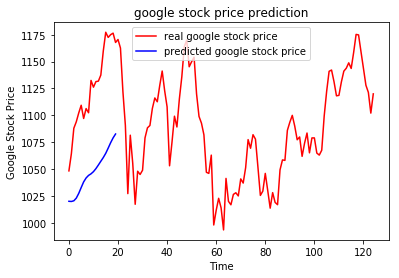

In [0]:
#Visualizing The Results of model
plt.plot(real_stock_price , color = 'red' , label='real google stock price' )
plt.plot(predicted_stock_price , color = 'blue' , label='predicted google stock price' )
plt.title('google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
